# Linear Regression 

Simple linear regression models the relationshop between the magintude of on variable and that of a second, we want to see how and increase in X will effect Y or vice versa how a decrease in X will effect Y. X and Y are positivily correlated when X increase Y too increase and negativily correlated when X decreases and Y decreases. 

In [1]:
url = 'https://raw.githubusercontent.com/KCMachineLearning-AI-Group/KCAICoop-Getting-Started/master/week_2_data/ds1.csv'

In [28]:
#import the data into a DataFrame using pandas, a DataFrame is tabular data 
import pandas as pd
data_set = pd.read_csv(url, sep=',', index_col=0)

In [29]:
#Next we can observe the first 5 rows using the .head() method from pandas
data_set.head()

,x,y
1,71.701491,989.568584
2,-39.566061,-445.524235
3,-9.737956,-120.750964
4,68.658128,619.764027
5,74.999762,661.788583


In [30]:
#Lets find out if x and y are correlated
print(data_set.corr())

          x         y
x  1.000000  0.921825
y  0.921825  1.000000


## Data Viz of the x and y 

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

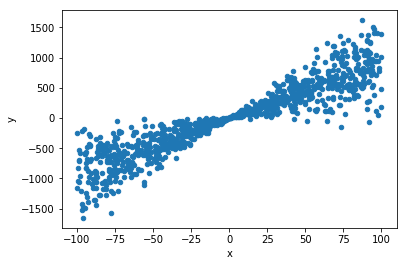

In [32]:
#plotting the graphing using pandas 
data_set.plot.scatter('x', 'y')

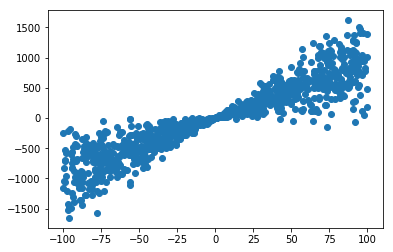

In [33]:
#plotting the graph using matplotlib
plt.scatter(data_set['x'], data_set['y'])

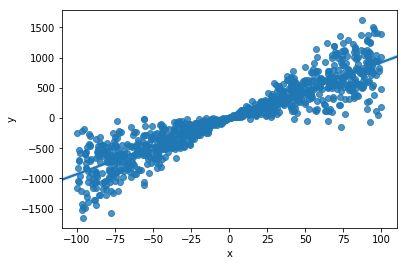

In [34]:
#plotting using seaborn, seaborn adds a regression line to the graph
sns.regplot(x='x', y='y', data=data_set)

## Understanding the Regression Equation

Since the x and y are postivily correlated we should expect the an increase in x to increase y. With regression, we are trying to predict the Y variable from X using a linear relationship:
    y = b0 (intercept) + b1 (coeffecient) * X
We read this equation as "Y equals b1 time X, plus a constant b0.". 

### Build the model using python library sklearn

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [61]:
#First we create the feature set we name X, then we create the predictor set called y
X = pd.DataFrame(data_set['x']) 
y = pd.DataFrame(data_set['y'])

,x
1,71.701491
2,-39.566061
3,-9.737956
4,68.658128
5,74.999762


In [64]:
#Next we split the data to a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

The test set creates to set aside from the orginal data to understand how the model performs. 

In [58]:
#Now we use instantiation to initialize the LinearRegression Class from sklearn
lr_model = LinearRegression()

In [59]:
#We can not fit the data to the LinearRegression model using the training data
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

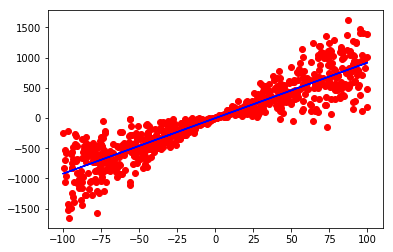

In [63]:
plt.scatter(X_train['x'], y_train['y'], color = 'red')
plt.plot(X_train, lr_model.predict(X_train), color='blue')
plt.show()

In [66]:
print("The model Y =  ", lr_model.coef_, " * X  + ", lr_model.intercept_)

The model Y =   [[ 9.1859367]]  * X  +  [-2.93803071]


We can intpret the model as a 1 increase in X will increase Y by 9.18. So if X = 5, we can predict y = 42.97 

### Fitted Values and Residuals

Important concepts in regression analysis are fitted values and residuals. The fittedd values, are also refereed to as the predicted values. We compute the residual values by subtracting the predicted values from the origianl data. 

In [70]:
# For example 
X['x'][3], y['y'][3]

(-9.737956197932359, -120.750963981871)

If we were to plug -9.73 into our prediction model we would predict y = -92.25
Our residual value = -120.72 - (-92.25) = -28.47

### Least Squares

The regression line is the estimate that minimizes the sum of squared residual values, also called the residual sum of squares
    RSS = sum(y_actual - y_predicted)^2
The method of minimizing the sum of the squared residuals is termed least squares regression or ordinal least squares (OLS) resgression. 

### Assessing the Model

The most important preformance metric from a data science perspective is root mean squared error RMSE, is the square root of the average squared error in the y_predicted values

In [71]:
#Now we predict y using the test set
y_predicted = lr_model.predict(X_test)

In [79]:
#We can assess the model using rmse
from sklearn.metrics import mean_absolute_error
print("RMSE: ", mean_absolute_error(y_test, y_predicted)**(.05))

RMSE:  1.28237890384


Another useful metric is the coefficient of determination also called the R^2 statistic. R^2 ranges from 0 to 1 and measures the proportion of variation in the data that is accounted for in the model.

In [78]:
from sklearn.metrics import r2_score
print("R^2: ", r2_score(y_test, y_predicted))

R^2:  0.873554699095


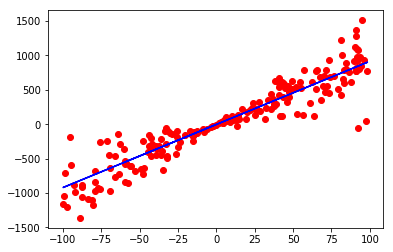

In [80]:
#Visualize the test model
plt.scatter(X_test['x'], y_test['y'], color = 'red')
plt.plot(X_test, lr_model.predict(X_test), color='blue')
plt.show()

The more linear the graph the better we did at predicting y


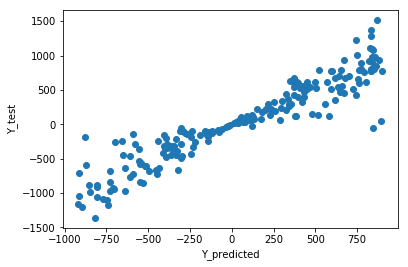

In [83]:
#plot y_predicted vs y_actual
plt.scatter(y_predicted, y_test['y'])
plt.xlabel('Y_predicted')
plt.ylabel('Y_test')
print("The more linear the graph the better we did at predicting y")

## We can try using KNN Regression

In [84]:
from sklearn.neighbors import KNeighborsRegressor

In [85]:
kn_model = KNeighborsRegressor()

In [86]:
kn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [87]:
y_predicted = kn_model.predict(X_test)

In [88]:
print("RMSE: ", mean_absolute_error(y_test, y_predicted)**(.05))

RMSE:  1.29132697876


In [89]:
print("R^2: ", r2_score(y_test, y_predicted))

R^2:  0.844765662422
